분류(classification)의 목표
- 입력벡터 $\bf x$를 $K$개의 가능한 클래스 중에서 하나의 클래스로 할당하는 것

분류를 위한 결정이론
- 확률적 모델 (probabilistic model)
  * 생성모델 (generative model): $p({\bf x}|\mathcal{C}_k)$와 $p(\mathcal{C}_k)$를 모델링한다음 베이즈 정리를 사용해서 클래스의 사후 확률 $p(\mathcal{C}_k|{\bf x})$를 구한다. 또는 결합확률 $p({\bf x}, \mathcal{C}_k)$을 직접 모델링할 수도 있다.
  * 식별모델 (discriminative model): $p(\mathcal{C}_k|{\bf x})$를 직접적으로 모델링한다.
- 판별함수 (discriminant function): 입력 $\bf x$을 클래스로 할당하는 판별함수(discriminant function)를 찾는다. 확률값은 계산하지 않는다.

### 판별함수 (Discriminant functions)

입력 $\bf x$을 클래스로 할당하는 판별함수(discriminant function)를 찾고자 한다. 여기서는 그러한 함수 중 선형함수만을 다룰 것이다.

### 두 개의 클래스

선형판별함수는 다음과 같다.
$$y({\bf x})={\bf w^Tx}+w_0$$

- $\bf w$: 가중치 벡터 (weight vector)
- $w_0$: 바이어스 (bias)

$y({\bf x}) \ge 0$ 인 경우 이를 $\mathcal{C}_1$으로 판별하고 아닌 경우 $\mathcal{C}_2$으로 판별한다.

결정 경계 (decision boundary)
- $y({\bf x})=0$
- $D-1$차원의 hyperplane ($\bf x$가 $D$차원의 입력벡터일 때)

결정 경계면 위의 임의의 두 점 ${\bf x}_A$와 ${\bf x}_B$
- $y({\bf x}_A)=y({\bf x}_B)=0$
- ${\bf w^T}({\bf x}_A-{\bf x}_B)=0$ => $\bf w$는 결정 경계면에 수직

원점에서 결정경계면까지의 거리

벡터 ${\bf w}_{\perp}$를 원점에서 결정 경계면에 대한 사영(projection)이라고 하자.
\begin{align*}
&r\frac{{\bf w}}{\| {\bf w}\|} = {\bf w}_{\perp}\\
&y({\bf w}_{\perp}) = 0\\
&{\bf w}^T{\bf w}_{\perp} + w_0 = 0\\
&\frac{{\bf w}^T{\bf w}}{\|{\bf w}\|}r + w_0 = 0\\
&\|{\bf w}\| r + w_0 = 0\\
& r = -\dfrac{w_0}{\|{\bf w}\|}
\end{align*}

따라서 $w_0$은 결정 경계면의 위치를 결정한다.
- $w_0<0$이면 결정 경계면은 원점으로부터 $\bf w$가 향하는 방향으로 멀어져있다.
- $w_0>0$이면 결정 경계면은 원점으로부터 $\bf w$의 반대 방향으로 멀어져있다.

예제: $y(x_1, x_2) = x_1 + x_2 - 1$

또한 $y({\bf x})$값은 $\bf x$와 결정 경계면 사이의 부호화된 거리와 비례한다.

임의의 한 점 $\bf x$의 결정 경계면에 대한 사영을 ${\bf x}_\perp$이라고 하자.

$${\bf x}={\bf x}_\perp + r\dfrac{\bf w}{\|{\bf w}\|}$$

$$r=\dfrac{y({\bf x})}{\|{\bf w}\|}$$

- $y({\bf x}) > 0$이면 ${\bf x}$는 결정 경계면을 기준으로 ${\bf w}$가 향하는 방향에 있다.
- $y({\bf x}) < 0$이면 ${\bf x}$는 결정 경계면을 기준으로 $-{\bf w}$가 향하는 방향에 있다.
- $y({\bf x})$의 절대값이 클 수록 더 멀리 떨어져 있다.

가짜입력(dummy input) $x_0=1$을 이용해서 수식을 단순화
- ${\bf \widetilde{w}}=(w_0, {\bf w})$
- ${\bf \widetilde{x}}=(x_0, {\bf x})$
- $y({\bf x})={\bf \widetilde{w}}^T{\bf \widetilde{x}}$

### 다수의 클래스
$$y_k({\bf x})={\bf w}_k^T{\bf x}+w_{k0}$$
$k=1,\ldots,K$

위와 같은 판별함수는 $j{\neq}k$일 때 $y_k({\bf x})>y_j({\bf x})$를 만족하면 $\bf x$를 클래스 $\mathcal{C}_k$로 판별하게 된다.

### 분류를 위한 최소제곱법 (Least squares for classification)

$$y_k({\bf x})={\bf w}_k^T{\bf x}+w_{k0}$$
$k=1,\ldots,K$

아래와 같이 행렬 ${\bf \widetilde{W}}$을 사용하여 간편하게 나타낼 수 있다.

$$y({\bf x}) = {\bf \widetilde{W}}^T{\bf \widetilde{x}}$$

${\bf \widetilde{W}}$의 $k$번째 열은 ${\bf \widetilde{w}}_k = (w_{k0}, {\bf w}_k^T)^T$이다.

#### 제곱합 에러 함수
학습데이터 $\{{\bf x}_n, {\bf t}_n\}$, $n=1,\ldots,N$, $n$번째 행이 ${\bf t}_n^T$인 행렬 ${\bf T}$, $n$번째 행이 ${\bf \widetilde{x}}_n^T$인 행렬 ${\bf \widetilde{X}}$이 주어졌을 때 제곱합 에러함수(sum-of-squared error function)은
$$E_D({\bf \widetilde{W}}) = \frac{1}{2}\mathrm{tr}\left\{ \left({\bf \widetilde{X}}{\bf \widetilde{W}}-{\bf T} \right)^T \left({\bf \widetilde{X}}{\bf \widetilde{W}}-{\bf T} \right) \right\}$$
로 표현할 수 있다.

아래와 같이 유도할 수 있다.

$${\bf \widetilde{X}} =
\begin{bmatrix}
\vdots\\
\rule[.5ex]{1.7ex}{0.5pt} {\bf \widetilde{x}}_n^T \rule[.5ex]{1.7ex}{0.5pt}\\
\vdots
\end{bmatrix},~~
{\bf \widetilde{W}} =
\begin{bmatrix}
\vert\\
\cdots {\bf \widetilde{w}}_k \cdots\\
\vert
\end{bmatrix},~~
{\bf T}=
\begin{bmatrix}
\vdots\\
\rule[.5ex]{1.7ex}{0.5pt} {\bf t}_n^T \rule[.5ex]{1.7ex}{0.5pt}\\
\vdots
\end{bmatrix}
$$

\begin{align*}
E_D({\bf \widetilde{W}}) &= \frac{1}{2}\sum_{n=1}^N\sum_{k=1}^K \left({\bf \widetilde{x}}_n^T{\bf \widetilde{w}}_k - {\bf t}_{nk}\right)^2\\
&= \frac{1}{2}\sum_{n=1}^N \left( {\bf \widetilde{x}}_n^T {\bf \widetilde{W}} - {\bf t}_n^T \right) \left( {\bf \widetilde{x}}_n^T {\bf \widetilde{W}} - {\bf t}_n^T \right)^T\\
&= \frac{1}{2}\sum_{n=1}^N \mathrm{tr}\left\{ \left( {\bf \widetilde{x}}_n^T {\bf \widetilde{W}} - {\bf t}_n^T \right) \left( {\bf \widetilde{x}}_n^T {\bf \widetilde{W}} - {\bf t}_n^T \right)^T \right\}\\
&= \frac{1}{2}\sum_{n=1}^N \mathrm{tr}\left\{ \left( {\bf \widetilde{x}}_n^T {\bf \widetilde{W}} - {\bf t}_n^T \right)^T \left( {\bf \widetilde{x}}_n^T {\bf \widetilde{W}} - {\bf t}_n^T \right) \right\}\\
&= \frac{1}{2}\mathrm{tr}\left\{ \sum_{n=1}^N \left( {\bf \widetilde{x}}_n^T {\bf \widetilde{W}} - {\bf t}_n^T \right)^T \left( {\bf \widetilde{x}}_n^T {\bf \widetilde{W}} - {\bf t}_n^T \right) \right\}\\
&= \frac{1}{2}\mathrm{tr}\left\{ \left({\bf \widetilde{X}}{\bf \widetilde{W}}-{\bf T} \right)^T \left({\bf \widetilde{X}}{\bf \widetilde{W}}-{\bf T} \right) \right\}
\end{align*}

마지막 과정
\begin{align*}
{\bf A} &= {\bf X}{\bf W} - {\bf T} = 
\begin{bmatrix}
\vdots\\
\rule[.5ex]{1.7ex}{0.5pt} {\bf x}_n^T {\bf W} - {\bf t}_n^T\rule[.5ex]{1.7ex}{0.5pt}\\
\vdots
\end{bmatrix}\\
{\bf A}^T{\bf A} &=
\begin{bmatrix}
\vert\\
\cdots \left({\bf x}_n^T {\bf W} - {\bf t}_n^T\right)^T\cdots\\
\vert
\end{bmatrix}
\begin{bmatrix}
\vdots\\
\rule[.5ex]{1.7ex}{0.5pt} {\bf x}_n^T {\bf W} - {\bf t}_n^T\rule[.5ex]{1.7ex}{0.5pt}\\
\vdots
\end{bmatrix}\\
&= \sum_{n=1}^N \left( {\bf x}_n^T {\bf W} - {\bf t}_n^T \right)^T \left( {\bf x}_n^T {\bf W} - {\bf t}_n^T \right)
\end{align*}


${\bf \widetilde{W}}$에 대한 $E_D({\bf \widetilde{W}})$의 최솟값을 구하면
$$\widetilde{\bf W}=(\widetilde{\bf X}^T\widetilde{\bf X})^{-1}\widetilde{\bf X}^T{\bf T}=\widetilde{\bf X}^{\dagger}{\bf T} $$

따라서 판별함수는 다음과 같다.
$$y({\bf x})=\widetilde{\bf W}^T\widetilde{\bf x}={\bf T}^T\left(\widetilde{\bf X}^{\dagger}\right)^T\widetilde{\bf x}$$

### 퍼셉트론 알고리즘 (The perceptron algorithm)

$$y({\bf x})=f({\bf w}^T\phi({\bf x}))$$

여기서 $f$는 활성 함수(activation fucntion)로 퍼셉트론은 아래와 같은 계단형 함수를 사용한다.

$$f(a)= \left\{ {\begin{array}{ll}+1, & a \ge 0 \\-1, & a \lt 0 \end{array}} \right.$$

여기서 $\phi_0({\bf x})=1$이다.

에러함수
$$E_P({\bf w})=-\sum_{n \in \mathcal{M}}{\bf w}^T\phi_nt_n$$

$\mathcal{M}$은 잘못 분류된 데이터들의 집합

Stochastic gradient descent의 적용
$${\bf w}^{(\tau+1)}={\bf w}^{(\tau)}-\eta\triangledown E_p({\bf w})={\bf w}^{(\tau)}+\eta\phi_n{t_n}$$

위 업데이트가 실행될 때 잘못 분류된 샘플에 미치는 영향
$$-{\bf w}^{(\tau+1)T}{\phi}_n{t_n} = -{\bf w}^{(\tau)T}{\phi_n}{t_n}-(\phi_n{t_n})^T\phi_n{t_n} < -{\bf w}^{(\tau)T}\phi_n{t_n}$$

### 확률적 생성 모델 (Probabilistic Generative Models)

이제 분류문제를 확률적 관점에서 살펴보고자 한다. 선형회귀와 마찬가지로 확률적 모델은 통합적인 관점을 제공해준다. 예를 들어 데이터의 분포에 관해 어떤 가정을 두게 되면 앞에서 살펴본 선형적인 결정경계(linear decision boundary)가 그 결과로 유도되는 것을 보게 될 것이다.

$p({\bf x}|\mathcal{C}_k)$와 $p(\mathcal{C}_k)$를 모델링한다음 베이즈 정리를 사용해서 클래스의 사후 확률 $p(\mathcal{C}_k|{\bf x})$를 구한다. 이전의 판별함수 방법에서는 어떤 에러함수를 최소화시키기 위한 최적의 파라미터를 찾는 것이 목적이라면 확률적 모델은 데이터의 분포(클래스를 포함한)를 모델링하면서 분류문제를 결과적으로 풀게 된다.

$$p(\mathcal{C}_1|{\bf x}) = \dfrac{p({\bf x}|\mathcal{C}_1)p(\mathcal{C}_1)}{p({\bf x}|\mathcal{C}_1)p(\mathcal{C}_1)+p({\bf x}|\mathcal{C}_2)p(\mathcal{C}_2)}=\dfrac{1}{1+\exp(-a)} = \sigma(a)$$

$$a=\ln{\dfrac{p({\bf x}|\mathcal{C}_1)p(\mathcal{C}_1)}{p({\bf x}|\mathcal{C}_2)p(\mathcal{C}_2)}}$$

$$\sigma(a)=\dfrac{1}{1+\exp(-a)}$$

Logistic sigmoid의 성질 및 역함수
- $\sigma(-a) = 1 - \sigma(a)$
- $a=\ln\left(\dfrac{\sigma}{1-\sigma}\right)$

$K>2$인 경우
$$p(\mathcal{C}_k|{\bf x}) = \dfrac{p({\bf x}|\mathcal{C}_k)p(\mathcal{C}_k)}{\sum_j{p({\bf x}|\mathcal{C}_j)p(\mathcal{C}_j)}}=\dfrac{\exp(a_k)}{\sum_j{\exp(a_j)}}$$

$$a_k = p({\bf x}|\mathcal{C}_k)p(\mathcal{C}_k)$$


### 연속적 입력 (continous inputs)

$p({\bf x}|\mathcal{C}_k)$가 가우시안 분포를 따르고 모든 클래스에 대해 공분산이 동일하다고 가정하자.

$$p({\bf x}|\mathcal{C}_k) = \dfrac{1}{(2\pi)^{D/2}|\Sigma|^{1/2}}\exp\left\{-\dfrac{1}{2}({\bf x}-{\pmb \mu}_k)^T\Sigma^{-1}({\bf x}-{\pmb \mu}_k)\right\}$$

두 개의 클래스인 경우

$$p(\mathcal{C}_1|{\bf x}) = \sigma(a)$$

$a$를 전개하면
\begin{align*}
a &= \ln{\dfrac{p({\bf x}|\mathcal{C}_1)p(\mathcal{C}_1)}{p({\bf x}|\mathcal{C}_2)p(\mathcal{C}_2)}}\\
&= -\frac{1}{2}({\bf x}-{\pmb \mu}_1)^T\Sigma^{-1}({\bf x}-{\pmb \mu}_1)+\frac{1}{2}({\bf x}-{\pmb \mu}_2)^T\Sigma^{-1}({\bf x}-{\pmb \mu}_2)+\ln\frac{p(\mathcal{C}_1)}{p(\mathcal{C}_2)}\\
&= \left\{\left( {\pmb \mu}_1^T - {\pmb \mu}_2^T \right)\Sigma^{-1}\right\}{\bf x} - \frac{1}{2}{\pmb \mu}_1^T\Sigma^{-1}{\pmb \mu}_1 + \frac{1}{2}{\pmb \mu}_2^T\Sigma^{-1}{\pmb \mu}_2 + \ln\frac{p(\mathcal{C}_1)}{p(\mathcal{C}_2)}
\end{align*}

따라서 $a$를 $\bf x$에 관한 선형식으로 다음과 같이 정리할 수 있다.

$$p(\mathcal{C}_1|{\bf x}) = \sigma({\bf w}^T{\bf x}+w_0)$$

\begin{align*}
{\bf w} &= \Sigma^{-1}({\pmb \mu}_1 - {\pmb \mu}_2)\\
w_0 &= - \frac{1}{2}{\pmb \mu}_1^T\Sigma^{-1}{\pmb \mu}_1 + \frac{1}{2}{\pmb \mu}_2^T\Sigma^{-1}{\pmb \mu}_2 + \ln\frac{p(\mathcal{C}_1)}{p(\mathcal{C}_2)}
\end{align*}

$K$개의 클래스인 경우

$${\bf w}_k = \Sigma^{-1}{\pmb \mu}_k$$

$$w_{k0} = -\frac{1}{2}{\pmb \mu}_{k}^{T}\Sigma^{-1}{\pmb \mu}_k + \ln p(\mathcal{C}_k)$$

### 최대우도해 (Maximum likelihood solution)

이제 MLE를 통해 모델 파라미터들을 구해보자. 두 개의 클래스인 경우를 살펴본다.

데이터
- $\{{\bf x}_n, t_n\}$, $n=1,\ldots,N$. $t_n=1$은 클래스 $\mathcal{C}_1$을 $t_n=0$은 클래스 $\mathcal{C}_2$를 나타낸다고 하자.

파라미터들
- $p(\mathcal{C}_1)=\pi$라고 두면, 구해야 할 파라미터들은 ${\pmb \mu}_1$, ${\pmb \mu}_2$, $\Sigma$, $\pi$이다.


우도식 유도

- $t_n=1$이면
$$p({\bf x}_n, \mathcal{C}_1) = p(\mathcal{C}_1)p({\bf x}_n|\mathcal{C}_1) = \pi \mathcal{N}({\bf x}_n|\mu_1, \Sigma)$$

- $t_n=0$이면
$$p({\bf x}_n, \mathcal{C}_2) = p(\mathcal{C}_2)p({\bf x}_n|\mathcal{C}_2) = (1-\pi) \mathcal{N}({\bf x}_n|\mu_2, \Sigma)$$

따라서 우도함수는

$$p({\bf t}| \pi, {\pmb \mu}_1, {\pmb \mu}_2, \Sigma) = \prod_{n=1}^N\left[\pi \mathcal{N}({\bf x}_n|{\pmb \mu}_1, \Sigma)\right]^{t_n}\left[(1-\pi)\mathcal{N}({\bf x}_n|{\pmb \mu}_2, \Sigma)\right]^{1-t_n}$$

${\bf t} = (t_1,\ldots,t_N)^T$

### $\pi$ 구하기

로그우도함수에서 $\pi$ 관련항들만 모으면

$$\sum_{n=1}^{N}\left\{ t_n\ln\pi + (1-t_n)\ln(1-\pi) \right\}$$

이 식을 $\pi$에 관해 미분하고 0으로 놓고 풀면

$$\pi = \dfrac{1}{N}\sum_{n=1}^{N}t_n = \dfrac{N_1}{N} = \dfrac{N_1}{N_1+N_2}$$

$N_1$은 $\mathcal{C}_1$에 속하는 샘플의 수이고 $N_2$는 $\mathcal{C}_2$에 속하는 샘플의 수이다.

### ${\pmb \mu}_1$, ${\pmb \mu}_2$ 구하기

${\pmb \mu}_1$ 관련항들

$$\sum_{n=1}^{N}t_n\ln \mathcal{N}({\bf x}_n|{\pmb \mu}_1, \Sigma) = -\dfrac{1}{2}\sum_{n=1}^{N}t_n({\bf x}_n-{\pmb \mu}_1)^T\Sigma^{-1}({\bf x}_n-{\pmb \mu}_1) + \mathrm{const}$$

이 식을 ${\pmb \mu}_1$에 관해 미분하고 0으로 놓고 풀면

$${\pmb \mu}_1=\dfrac{1}{N_1}\sum_{n=1}^{N}t_n{\bf x}_n$$

유사하게

$${\pmb \mu}_2=\dfrac{1}{N_2}\sum_{n=1}^{N}(1-t_n){\bf x}_n$$

### $\Sigma$ 구하기

\begin{align*}
&-\dfrac{1}{2}\sum_{n=1}^{N}t_n\ln |\Sigma| -\dfrac{1}{2}\sum_{n=1}^{N}t_n({\bf x}_n-{\pmb \mu}_1)^T\Sigma^{-1}({\bf x}_n-{\pmb \mu}_1)\\
&-\dfrac{1}{2}\sum_{n=1}^{N}(1-t_n)\ln |\Sigma| -\dfrac{1}{2}\sum_{n=1}^{N}(1-t_n)({\bf x}_n-{\pmb \mu}_2)^T\Sigma^{-1}({\bf x}_n-{\pmb \mu}_2)\\
&= -\dfrac{N}{2}\ln |\Sigma| - \dfrac{N}{2}\mathrm{tr}\left(\Sigma^{-1}{\bf S}\right)
\end{align*}

\begin{align*}
{\bf S} &=\dfrac{N_1}{N}{\bf S}_1+\dfrac{N_2}{N}{\bf S}_2\\
{\bf S}_1 &= \dfrac{1}{N_1}\sum_{n \in \mathcal{C}_1} ({\bf x}_n-{\pmb \mu}_1)({\bf x}_n-{\pmb \mu}_1)^T\\
{\bf S}_2 &= \dfrac{1}{N_2}\sum_{n \in \mathcal{C}_2} ({\bf x}_n-{\pmb \mu}_2)({\bf x}_n-{\pmb \mu}_2)^T
\end{align*}

가우시안 분포의 최대우도를 구하는 방법을 그대로 쓰면 결국은

$$\Sigma = {\bf S}$$

### 입력이 이산값일 경우 (Discrete features)

각 특성 $x_i$가 0과 1중 하나의 값만을 가질 수 있는 경우

클래스가 주어졌을 때 특성들이 조건부독립(conditional independence)이라는 가정을 할 경우 문제는 단순화된다. 이것을 naive Bayes가정이라고 한다. 이 때 $p({\bf x}|\mathcal{C}_k)$는 다음과 같이 분해된다.

$$p({\bf x}|\mathcal{C}_k) = \prod_{i=1}^{D}\mu_{ki}^{x_i}(1-\mu_{ki})^{1-x_i}$$

따라서,

$$a_k({\bf x})=\ln p({\bf x}|\mathcal{C}_k)p(\mathcal{C}_k)$$

$$a_k({\bf x})=\sum_{i=1}^{D}\left\{x_i\ln \mu_{ki}+(1-x_i)\ln(1-\mu_{ki})\right\}+\ln p(\mathcal{C}_k)$$

### 확률적 식별 모델  (Probabilistic Discriminative Models)

앞의 생성모델에서는 $p(\mathcal{C}_k|{\bf x})$를 $\bf x$의 선형함수가 logistic sigmoid 또는 softmax를 통과하는 식으로 표현되는 것을 보았다. 즉, K=2인 경우

$$p(\mathcal{C}_1|{\bf x}) = \sigma({\bf w}^T{\bf x}+w_0)$$

그리고 파라미터들 ${\bf w}$와 $w_0$를 구하기 위해서 확률분포들 $p({\bf x}|\mathcal{C}_k)$, $p(\mathcal{C}_k)$의 파라미터들을 MLE로 구했다.

대안적인 방법은 $p(\mathcal{C}_k|{\bf x})$를 $\bf x$에 관한 함수로 파라미터화 시키고 이 파라미터들을 직접 MLE를 통해 구하는 것이다.

이제부터는 입력벡터 $\bf x$대신 비선형 기저함수(basis function)들 $\phi({\bf x})$를 사용할 것이다.

### 로지스틱 회귀 (Logistic regression)

클래스 $\mathcal{C}_1$의 사후확률은 특성벡터 $\phi$의 선형함수가 logistic sigmoid를 통과하는 함수로 아래와 같이 표현된다.

$$p(\mathcal{C}_1|\phi)=y(\phi)=\sigma({\bf w}^T\phi)$$

$$\sigma(a)=\dfrac{1}{1+\exp(-a)}$$

$p(\mathcal{C}_2|\phi) = 1 - p(\mathcal{C}_1|\phi)$

$\phi$가 $M$ 차원이라면 구해야 할 파라미터($\bf w$)의 개수는 $M$개이다. 생성모델에서는 $M(M+5)/2+1$개의 파라미터를 구해야 한다.

### 최대우도해

- 데이터셋: $\{\phi_n, t_n\}$, $n=1,\ldots,N$
- $t_n \in \{0, 1\}$
- ${\bf t} = (t_1,\ldots,t_N)^T$
- $\phi_n = \phi({\bf x}_n)$
- $y_n = p(\mathcal{C}_1|\phi_n)$

우도함수는
$$p({\bf t}|{\bf w}) = \prod_{n=1}^{N}y_n^{t_n}(1-y_n)^{1-t_n}$$

음의 로그 우도 (the negative logarithm of the likelihood)

$$E({\bf w})= -\ln{p({\bf t}|{\bf w})} = - \sum_{n=1}^{N}\left\{t_n\ln{y_n}+(1-t_n)\ln(1-y_n)\right\}$$

$y_n = \sigma(a_n)$, $a_n = {\bf w}^T\phi_n$

이것을 크로스 엔트로피 에러함수(cross entropy error function)라고 부른다.

Cross entropy의 일반적인 정의

$$H(p,q) = -\mathbb{E}_p[\ln q]$$

이산확률변수의 경우
$$H(p,q) = -\sum_{x}p(x)\ln q(x)$$

일반적으로 Cross entropy가 최소화될 때 두 확률분포의 차이가 최소화된다. 따라서 에러함수 $E({\bf w})$를 최소화시키는 것을
- 우도를 최대화시키는 것
- 모델의 예측값(의 분포)과 목표변수(의 분포)의 차이를 최소화시키는 것

두 가지의 관점에서 이해할 수 있다.

에러함수의 $\bf w$에 대한 gradient를 구해보자.

$$E_n({\bf w})= -\left\{t_n\ln{y_n}+(1-t_n)\ln(1-y_n)\right\}$$
라고 정의하면

$$\triangledown E({\bf w}) = \sum_{n=1}^N \triangledown E_n({\bf w})$$

\begin{align*}
\triangledown E_n({\bf w}) &= \frac{\partial E_n({\bf w})}{\partial y_n}\frac{\partial y_n}{\partial a_n}\triangledown a_n\\
&= \left\{ \frac{1-t_n}{1-y_n} - \frac{t_n}{y_n}\right\} y_n(1-y_n)\phi_n\\
&= (y_n - t_n)\phi_n
\end{align*}

따라서

$$\triangledown E({\bf w}) = \sum_{n=1}^N (y_n - t_n)\phi_n$$

### 다중클래스 로지스틱 회귀 (Multiclass logistic regression)

$$p(\mathcal{C}_k|\phi) = y_k(\phi) = \frac{\exp(a_k)}{\sum_j \exp(a_j)}$$

$$a_k = {\bf w}_k^T \phi$$

### 우도함수

특성벡터 $\phi_n$를 위한 목표벡터 ${\bf t}_n$는 클래스에 해당하는 하나의 원소만 1이고 나머지는 0인 1-of-K 인코딩 방법으로 표현된다.
$$p({\bf T}|{\bf w}_1,...{\bf w}_K) = \prod_{n=1}^{N}\prod_{k=1}^{K} p(\mathcal{C}_k|\phi_n)^{t_{nk}} = \prod_{n=1}^{N}\prod_{k=1}^{K}y_{nk}^{t_{nk}}$$

$y_{nk} = y_k(\phi_n)$, ${\bf T}$는 $t_{nk}$를 원소로 가지고 있는 크기가 $N \times K$인 행렬

음의 로그 우도

$$E({\bf w}_1, ..., {\bf w}_K) = -\ln p({\bf T}|{\bf w}_1, ...,{\bf w}_K) = - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{nk}\ln(y_{nk})$$

${\bf w}_j$에 대한 gradient를 구한다. 먼저 하나의 샘플 $\phi_n$에 대한 에러

$$E_n({\bf w}_1,\ldots,{\bf w}_K) = -\sum_{k=1}^{K} t_{nk}\ln(y_{nk})$$
를 정의하면

$$\nabla_{ {\bf w}_j }E({\bf w}_1, ...,{\bf w}_K) = \sum_{n=1}^{N}\nabla_{ {\bf w}_j }E_n({\bf w}_1, ...,{\bf w}_K)$$

다음 함수들 사이의 관계를 주목하라.
- $E_n$와 ${\bf w}_j$의 관계는 오직 $a_{nj}$에만 의존한다($a_{nk}, k\neq j$는 ${\bf w}_j$의 함수가 아니다).
- $E_n$은 $y_{n1},\ldots,y_{nK}$의 함수이다.
- $y_{nk}$는 $a_{n1},\ldots,a_{nK}$의 함수이다.

\begin{align*}
\nabla_{ {\bf w}_j }E_n &= \frac{\partial E_n}{\partial a_{nj}} \frac{\partial a_{nj}}{\partial {\bf w}_j}\\
&= \frac{\partial E_n}{\partial a_{nj}}\phi_n\\
&= \sum_{k=1}^K \left( \frac{\partial E_n}{\partial y_{nk}} \frac{\partial y_{nk}}{\partial a_{nj}} \right)\phi_n\\
&= \phi_n \sum_{k=1}^K \left\{ -\frac{t_{nk}}{y_{nk}}y_{nk}(I_{kj}-y_{nj}) \right\}\\
&= \phi_n \sum_{k=1}^K t_{nk}(y_{nj} - I_{kj})\\
&= \phi_n \left( y_{nj}\sum_{k=1}^K t_{nk} - \sum_{k=1}^K t_{nk}I_{kj} \right)\\
&= \phi_n (y_{nj} - t_{nj})
\end{align*}

따라서
$$\nabla_{ {\bf w}_j }E({\bf w}_1, ...,{\bf w}_K) = \sum_{n=1}^{N} (y_{nj}-t_{nj})\phi_n$$

## Gradient Descent (batch)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

C:\Users\dongh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


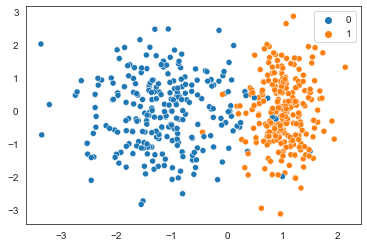

In [17]:
# X는 입력 값, t는 타겟 
X, t = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

t = t[:,np.newaxis]

sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=t.reshape(-1));

In [18]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [19]:
def compute_cost(X, t, w):
    N = len(t)
    h = sigmoid(X @ w)
    epsilon = 1e-5
    
    # 1/N을 곱해주는건 조금 더 안정적으로 구하기 위해
    cost = (1/N)*(((-t).T @ np.log(h + epsilon))-((1-t).T @ np.log(1-h + epsilon)))
    return cost

In [20]:
def gradient_descent(X, t, w, learning_rate, iterations):
    N = len(t)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        w = w - (learning_rate/N) * (X.T @ (sigmoid(X @ w) - t))
        cost_history[i] = compute_cost(X, t, w)

    return (cost_history, w)

In [21]:
def predict(X, w):
    return np.round(sigmoid(X @ w))

Initial Cost is: [[0.69312718]] 

Optimal Parameters are: 
 [[-0.07024012]
 [ 1.9275589 ]
 [ 0.02285894]] 



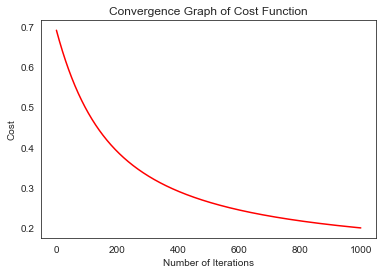

In [22]:
N = len(t)

# dummy input을 위해
X = np.hstack((np.ones((N,1)),X))

M = np.size(X,1)
w = np.zeros((M,1))

iterations = 1000
learning_rate = 0.01

initial_cost = compute_cost(X, t, w)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, w_optimal) = gradient_descent(X, t, w, learning_rate, iterations)

print("Optimal Parameters are: \n", w_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [23]:
## Accuracy

y_pred = predict(X, w_optimal)
score = float(sum(y_pred == t))/ float(len(t))

print(score)

0.954


C:\Users\dongh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


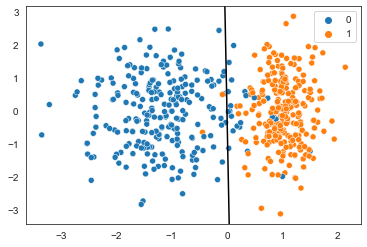

In [24]:
slope = -(w_optimal[1] / w_optimal[2])
intercept = -(w[0] / w_optimal[2])

sns.set_style('white')
sns.scatterplot(X[:,1],X[:,2],hue=t.reshape(-1));

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");

## Stochastic Gradient Descent

앞의 배치 방법과 유사하지만, 단지 파라미터 업데이트할 때 데이터 전체를 사용하는 것이 아니라 데이터 하나만 사용한다는 것이 다른 점이다

In [25]:
def sgd(X, t, w, learning_rate, iterations):
    N = len(t)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        i = i % N
        w = w - learning_rate * (X[i, np.newaxis].T * (sigmoid(X[i] @ w) - t[i]))
        cost_history[i] = compute_cost(X[i], t[i], w)

    return (cost_history, w)

Initial Cost is: [[0.69312718]] 

Optimal Parameters are: 
 [[-0.19304782]
 [ 2.5431236 ]
 [ 0.01130098]] 



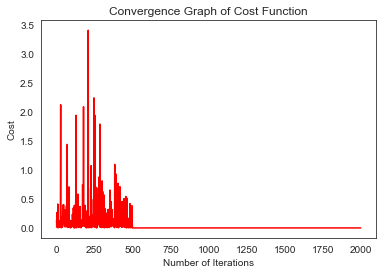

In [26]:
X, t = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

t = t[:,np.newaxis]

N = len(t)

X = np.hstack((np.ones((N,1)),X))
M = np.size(X,1)
w = np.zeros((M,1))

# 데이터 전체 1000번 읽은 것이 아니라 읽은 데이터 갯수가 1000개라는 뜻
iterations = 1000
learning_rate = 0.01

initial_cost = compute_cost(X, t, w)

print("Initial Cost is: {} \n".format(initial_cost))

# 여기만 다르다!
(cost_history, w_optimal) = sgd(X, t, w, learning_rate, iterations)

print("Optimal Parameters are: \n", w_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [27]:
## Accuracy

y_pred = predict(X, w_optimal)
score = float(sum(y_pred == t))/ float(len(t))

print(score)

0.96


## Mini-batch Gradient Descent
앞의 두 방법의 중간 방법 정도라고 이해하자!

In [28]:
def batch_gd(X, t, w, learning_rate, iterations, batch_size):
    N = len(t)
    cost_history = np.zeros((iterations,1))
    shuffled_indices = np.random.permutation(N)
    X_shuffled = X[shuffled_indices]
    t_shuffled = t[shuffled_indices]

    for i in range(iterations):
        i = i % N
        X_batch = X_shuffled[i:i+batch_size]
        t_batch = t_shuffled[i:i+batch_size]
        # batch가 epoch 경계를 넘어가는 경우, 앞 부분으로 채워줌
        if X_batch.shape[0] < batch_size:
            X_batch = np.vstack((X_batch, X_shuffled[:(batch_size - X_batch.shape[0])]))
            t_batch = np.vstack((t_batch, t_shuffled[:(batch_size - t_batch.shape[0])]))
        w = w - (learning_rate/batch_size) * (X_batch.T @ (sigmoid(X_batch @ w) - t_batch))
        cost_history[i] = compute_cost(X_batch, t_batch, w)

    return (cost_history, w)

Initial Cost is: [[0.69312718]] 

Optimal Parameters are: 
 [[-0.06016186]
 [ 1.94315855]
 [ 0.02058371]] 



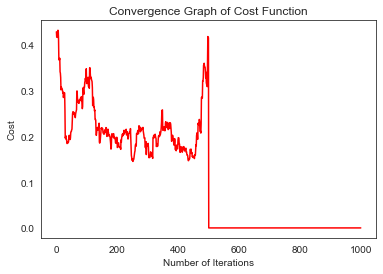

In [29]:
X, t = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

t = t[:,np.newaxis]

N = len(t)

X = np.hstack((np.ones((N,1)),X))
M = np.size(X,1)
w = np.zeros((M,1))

iterations = 1000
learning_rate = 0.01

initial_cost = compute_cost(X, t, w)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, w_optimal) = batch_gd(X, t, w, learning_rate, iterations, 32)

print("Optimal Parameters are: \n", w_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [30]:
## Accuracy

y_pred = predict(X, w_optimal)
score = float(sum(y_pred == t))/ float(len(t))

print(score)

0.954
